In [1]:
%matplotlib inline

### 导入相关工具包

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import jieba
import pprint

from os import path
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### 定义文件及资源

In [56]:
stopwords_path = '../data/stopword.txt'
user_dic = 'userdict.txt'
source_text = '../data/访谈记录.txt'

masker_bk_jpg = '../data/zryhyy.jpg'
masker_rcbk_png = '../data/redcross_mask.png'
rcbk_png = '../data/redcross.png'

font_path = "../data/simsun.ttf"

### 对Jieba做定制调整

In [12]:
# Read user define dictionary
jieba.load_userdict(user_dic)

#stopwords = set(STOPWORDS)
#stopwords.add("said")

### 读取资源文件
#### 读取分析原文本

In [57]:
# Read coloring masker
zryhyy_masker = np.array(Image.open(masker_rcbk_png))
zryhyy_coloring = np.array(Image.open(rcbk_png))

text = open(source_text).read()
text[:110]

'\ufeff角色1：院里一直都非常重视大家职业发展，包括来我们医院之后的一个工作体验，大家来医院有一年了，医院也是希望大家有一个面对面的沟通交流，把大家心里这一年来的工作的感受，还有你们的疑惑，或者希望我们从医院层面能给大家包括人'

### Jieba处理文本分词

In [48]:
mywordlist = []

## 分词
seg_list = jieba.cut(text, cut_all=False)
list_words = list(seg_list)
list_words

## 去掉stopword敏感词
with open(stopwords_path, encoding='utf-8') as f_stop:
    f_stop_text = f_stop.read()
    f_stop_seg_list = f_stop_text.splitlines()

for myword in list_words:
    if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
        mywordlist.append(myword)

str_final_words = ' '.join(mywordlist)

### 制作词云

In [52]:
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 390 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white"
               , mask=zryhyy_masker
               , random_state=42
               , font_path=font_path
              )
# generate word cloud
wc.generate(str_final_words)

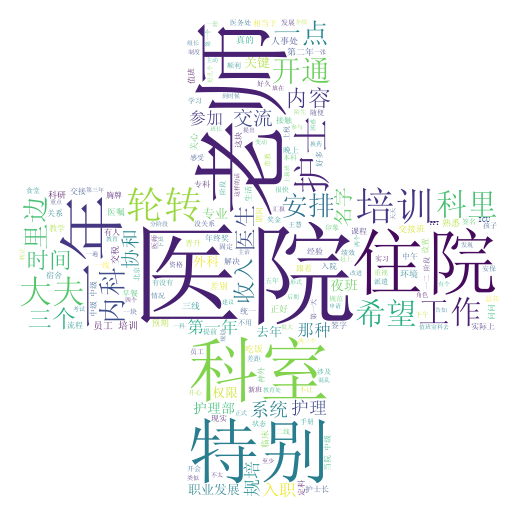

In [53]:
wc.to_image()

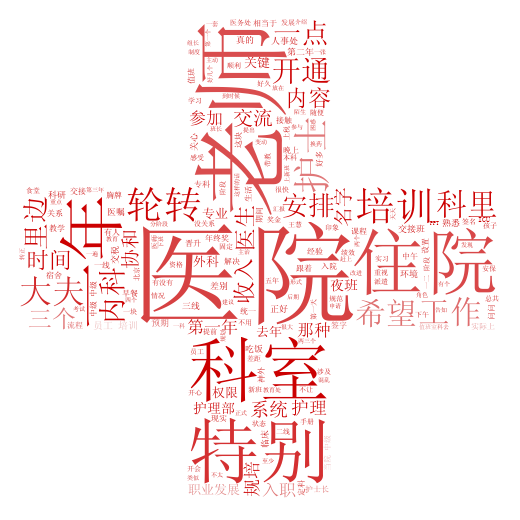

In [59]:
# create coloring from image
image_colors = ImageColorGenerator(zryhyy_coloring)
wc2 = wc.recolor(color_func=image_colors)
wc2.to_image()

### Top 15 关键词

In [60]:
counter = Counter(mywordlist)
pprint.pprint(counter.most_common(15))

[('医院', 40),
 ('老师', 30),
 ('培训', 29),
 ('住院', 28),
 ('特别', 26),
 ('科室', 26),
 ('一年', 24),
 ('护士', 22),
 ('轮转', 21),
 ('大夫', 16),
 ('工作', 15),
 ('希望', 14),
 ('科里', 14),
 ('开通', 13),
 ('内科', 12)]
